In [ ]:
 import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#import dataset from Colab
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/dataset/Updated_Real_News.csv"
!ls "/content/drive/My Drive/dataset/Fake_merged_Totoal.csv"

Mounted at /content/drive
'/content/drive/My Drive/dataset/Updated_Real_News.csv'
'/content/drive/My Drive/dataset/Fake_merged_Totoal.csv'


In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/dataset/Updated_Real_News.csv', engine='python', encoding='utf-8')
df1.shape

(2000, 5)

In [ ]:
df2= pd.read_csv('/content/drive/My Drive/dataset/Fake_merged_Totoal.csv', engine='python', encoding='utf-8')
df2.shape

(1516, 5)

In [ ]:
merge = [df1,df2]
df3 = pd.concat(merge)
df3.head()

,Unnamed: 0,headline,category,content,label
0,0,আজকের ভাগ্যচক্র,horoscope,\n আজকের এইদিনে জন্মগ্রহণ করায় পাশ্চাত্যমতে ...,1
1,1,একাওরের ইন্দিরা,various,ব্রিটিশদের উপনিবেশ বিভাজন নীতির ফসল পাকিস্তান...,1
2,2,কণ্ঠ দিয়ে মুক্তিযোদ্ধাদের অনুপ্রাণিত করেছিলাম,entertainment-news,মহান বিজয়ের মাস নিয়ে আপনার অভিব্যক্তি... \nব...,1
3,3,হানিমুনে কোথায় যাচ্ছেন তারা?,entertainment-news,তাদের বিয়ে নিয়ে দীর্ঘদিনের জল্পনার অবসান হলো।...,1
4,4,বুদ্ধিজীবী দিবসের গল্পে সাফা কবির,entertainment-news,১৪ ডিসেম্বর মহান বুদ্ধিজীবী দিবসকে সামনে রেখে...,1


In [ ]:
df3.isnull().sum()

Unnamed: 0     0
headline       0
category       0
content       23
label          0
dtype: int64

In [ ]:
df3.describe()

,Unnamed: 0,label
count,3516.000000,3516.000000
mean,814.984926,0.568828
std,549.801991,0.495310
min,0.000000,0.000000
25%,330.750000,0.000000
50%,770.000000,1.000000
75%,1209.250000,1.000000
max,1999.000000,1.000000


In [ ]:
df = df3[df3['content'].notnull()]

In [ ]:
df.describe()

,Unnamed: 0,label
count,3493.000000,3493.000000
mean,813.261952,0.565989
std,549.480490,0.495697
min,0.000000,0.000000
25%,328.000000,0.000000
50%,768.000000,1.000000
75%,1207.000000,1.000000
max,1999.000000,1.000000


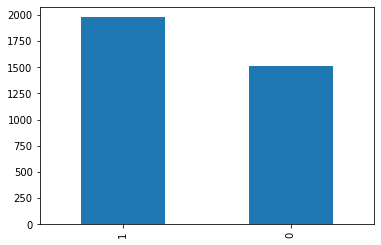

In [ ]:
df['label'].value_counts().plot(kind='bar')

In [ ]:
df = df.rename(columns={'Unnamed: 0': 'newsID'} )

In [ ]:
df.head()

,newsID,headline,category,content,label
0,0,আজকের ভাগ্যচক্র,horoscope,\n আজকের এইদিনে জন্মগ্রহণ করায় পাশ্চাত্যমতে ...,1
1,1,একাওরের ইন্দিরা,various,ব্রিটিশদের উপনিবেশ বিভাজন নীতির ফসল পাকিস্তান...,1
2,2,কণ্ঠ দিয়ে মুক্তিযোদ্ধাদের অনুপ্রাণিত করেছিলাম,entertainment-news,মহান বিজয়ের মাস নিয়ে আপনার অভিব্যক্তি... \nব...,1
3,3,হানিমুনে কোথায় যাচ্ছেন তারা?,entertainment-news,তাদের বিয়ে নিয়ে দীর্ঘদিনের জল্পনার অবসান হলো।...,1
4,4,বুদ্ধিজীবী দিবসের গল্পে সাফা কবির,entertainment-news,১৪ ডিসেম্বর মহান বুদ্ধিজীবী দিবসকে সামনে রেখে...,1


In [ ]:
df.isnull().sum()

newsID      0
headline    0
category    0
content     0
label       0
dtype: int64

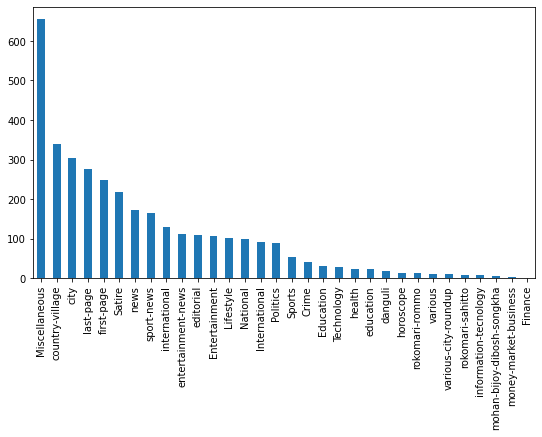

In [ ]:
df3['category'].value_counts().plot(kind='bar')

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9, 5)

In [ ]:
df.to_csv (r'/content/drive/My Drive/dataset/Experimented Real data.csv')

In [ ]:
df.shape

(3493, 5)

In [ ]:
y = df.label

In [ ]:
df = df.drop('label', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['content'], y, test_size=0.25, random_state=30)

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [ ]:
tfidf_vectorizer.get_feature_names()[-10:]

['ৰত', '৷ক', '৷গ', '৷তব', '৷দ', '৷প', '৷ব', '৷য', '৷স', '৷৪']

In [ ]:
count_vectorizer.get_feature_names()[:10]

['000',
 '01217546419',
 '13',
 '2016',
 '2018',
 '2019ব',
 '215728145813828',
 '24',
 '24sharetweet',
 '26']

In [ ]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [ ]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [ ]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

{'কর', 'পর', 'বল', 'হয়'}

In [ ]:
print(count_df.equals(tfidf_df))

False


In [ ]:
count_df.head()

,000,01217546419,13,2016,2018,2019ব,215728145813828,24,24sharetweet,26,30018,35,49,4th,500,550,65,7777,785,7college,7up,99,ab,abul,ac,academy,according,actor,adorable,adsbygoogle,adulting,aide,aim,air,airplane,airways,aj,al,alada,alam,...,৯৪,৯৪ট,৯৪০,৯৪১,৯৪৫,৯৫,৯৫০,৯৫০০,৯৫৪,৯৬,৯৬০,৯৬১,৯৬৬,৯৭,৯৭০,৯৭১ট,৯৭৪,৯৭৬,৯৭৭১,৯৭৮,৯৮,৯৮তম,৯৯,৯৯০,৯৯১,৯৯১ট,৯৯৪,৯৯৯,৯৯৯৭১৩,ৰক,ৰত,৷ক,৷গ,৷তব,৷দ,৷প,৷ব,৷য,৷স,৷৪
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
tfidf_df.head()

,000,01217546419,13,2016,2018,2019ব,215728145813828,24,24sharetweet,26,30018,35,49,4th,500,550,65,7777,785,7college,7up,99,ab,abul,ac,academy,according,actor,adorable,adsbygoogle,adulting,aide,aim,air,airplane,airways,aj,al,alada,alam,...,৯৪,৯৪ট,৯৪০,৯৪১,৯৪৫,৯৫,৯৫০,৯৫০০,৯৫৪,৯৬,৯৬০,৯৬১,৯৬৬,৯৭,৯৭০,৯৭১ট,৯৭৪,৯৭৬,৯৭৭১,৯৭৮,৯৮,৯৮তম,৯৯,৯৯০,৯৯১,৯৯১ট,৯৯৪,৯৯৯,৯৯৯৭১৩,ৰক,ৰত,৷ক,৷গ,৷তব,৷দ,৷প,৷ব,৷য,৷স,৷৪
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
clf = MultinomialNB()

accuracy:   0.875
Confusion matrix, without normalization


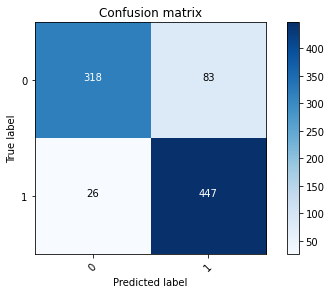

In [ ]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

In [ ]:
clf = MultinomialNB()

accuracy:   0.891
Confusion matrix, without normalization


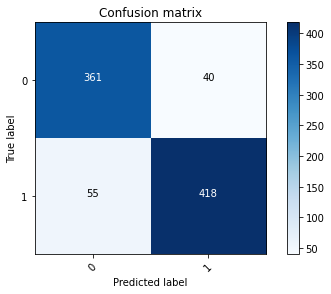

In [ ]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

In [ ]:
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=30)

accuracy:   0.912
Confusion matrix, without normalization


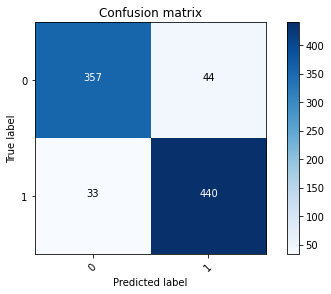

In [ ]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

In [ ]:
clf = MultinomialNB(alpha=0.1)

In [ ]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.87071
Alpha: 0.10 Score: 0.91304
Alpha: 0.20 Score: 0.91076
Alpha: 0.30 Score: 0.90389
Alpha: 0.40 Score: 0.90389
Alpha: 0.50 Score: 0.89817
Alpha: 0.60 Score: 0.88902
Alpha: 0.70 Score: 0.88444
Alpha: 0.80 Score: 0.88215
Alpha: 0.90 Score: 0.87643


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [ ]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

0 -4.684523906807881 eআরক
0 -4.075046726267314 আসল
0 -4.042884516443034 এখনও
0 -3.7136734356923187 উপর
0 -3.5466168973708934 গব
0 -3.466851309975736 সকল
0 -3.34393621483014 এই
0 -3.3378184934547765 রমন
0 -3.317157160257611 ষয
0 -3.231315298374826 এমনট
0 -3.166662114116049 source
0 -2.9653797368903363 শবনম
0 -2.9232913251997865 এছ
0 -2.86672714772299 এসময়
0 -2.8229596035277984 এইচআইভ
0 -2.80494388619426 মওদ
0 -2.784928878639121 আর
0 -2.7392871342344334 sharetweet
0 -2.7349901948996713 নরওয়
0 -2.7322693497617525 আপন
0 -2.65318133239607 আহস
0 -2.44632424567554 নয়শ
0 -2.4383116984516127 ২৫৩
0 -2.4242209110859103 আব
0 -2.385848949368196 ইফত
0 -2.3790144483867994 বয
0 -2.3605289069273963 পক
0 -2.2969269249049233 ধরণ
0 -2.294542726253388 মদপ
0 -2.2914614755677776 ণরস

1 6.855005802319622 গতক
1 4.583728939762909 ওপর
1 4.192483909512156 করপ
1 3.9677334057688007 সঙ
1 3.5259505735620853 উপজ
1 3.5091495309786787 ওঠ
1 3.0865478547720193 নম
1 3.0630565693053926 পণ
1 2.9202114770793073 লন
1 2.9111441

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names()

In [ ]:
### Most real
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-5.566468120440098, 'রত'),
 (-5.649464241394212, 'ওয়'),
 (-5.6651870317736135, 'জন'),
 (-5.684371230878551, 'সম'),
 (-5.68485466604783, 'অন'),
 (-5.777720763746332, 'বর'),
 (-5.825163804392165, 'চন'),
 (-5.866335234440495, 'রণ'),
 (-5.915833750649552, 'শন'),
 (-5.945965410549309, 'উদ'),
 (-5.956591145008989, 'রম'),
 (-5.964182542293092, 'গতক'),
 (-5.981996230586967, 'অভ'),
 (-5.992276297929461, 'সভ'),
 (-6.001468803637646, 'আল'),
 (-6.0092702669275395, 'হব'),
 (-6.019106047857793, 'পত'),
 (-6.019915341609585, 'মন'),
 (-6.028468532169026, 'ঘটন'),
 (-6.029381047399918, 'তর')]

In [ ]:
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-9.80336003145603, '000'),
 (-9.80336003145603, '01217546419'),
 (-9.80336003145603, '13'),
 (-9.80336003145603, '2016'),
 (-9.80336003145603, '2018'),
 (-9.80336003145603, '2019ব'),
 (-9.80336003145603, '215728145813828'),
 (-9.80336003145603, '24'),
 (-9.80336003145603, '24sharetweet'),
 (-9.80336003145603, '26'),
 (-9.80336003145603, '30018'),
 (-9.80336003145603, '35'),
 (-9.80336003145603, '49'),
 (-9.80336003145603, '4th'),
 (-9.80336003145603, '500'),
 (-9.80336003145603, '65'),
 (-9.80336003145603, '7777'),
 (-9.80336003145603, '785'),
 (-9.80336003145603, '7up'),
 (-9.80336003145603, '99')]

In [ ]:
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))

In [ ]:
hash_vectorizer = HashingVectorizer(stop_words='english')
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

In [ ]:
clf = MultinomialNB(alpha=.01)

In [ ]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

In [ ]:
clf = PassiveAggressiveClassifier(n_iter_no_change=30)

accuracy:   0.907
Confusion matrix, without normalization


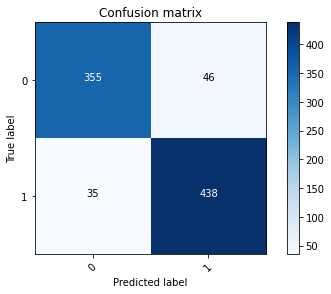

In [ ]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])